# Klasifikace a logistická regrese

  * Import používaných knihoven.
  * Logistická regrese je v `sklearn.linear_model` jako `LogisticRegression`.
  * Používá se pak klasicky dle obvyklého API modelů ve `scikit-learn`.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import neighbors 
from sklearn.linear_model import LogisticRegression

## Umělá data

  * Vygenerujeme si umělá data s dvěma příznaky $X_0$ a $X_1$ a binární vysvětlovanou promennou.
  * Je to směs dvou dvourozměrných Gaussiánů.


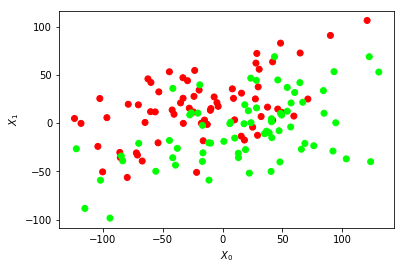

In [2]:
mean1 = [-20, 20]
cov1 = [[3000, 850], [850, 1000]]
mean2 = [10, -10]
cov2 = [[3000, 850], [850, 1000]]
n1 = 70
n2 = 70
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

X1 = np.random.multivariate_normal(mean1, cov1, n1)
y1 = np.zeros(n1,dtype="int")
X2 = np.random.multivariate_normal(mean2, cov2, n2)
y2 = np.ones(n2,dtype="int")

X = np.concatenate((X1,X2), axis=0)
y = np.concatenate((y1,y2), axis=0)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.show()


# print(X)
# print(Y)

## Rozhodovací hranice (boundary decision)

### KNN

  * Použijeme pro srovnání KNN, které známe, a ukážeme si, jak vypadá hranice, kde se mění rozhodnutí.

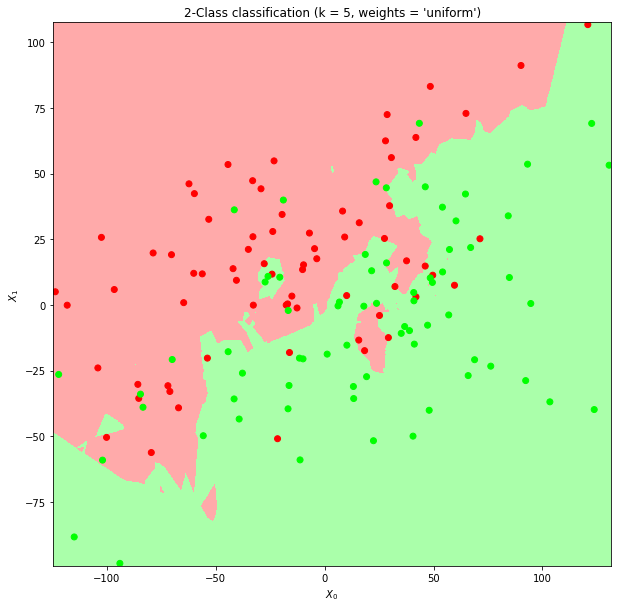

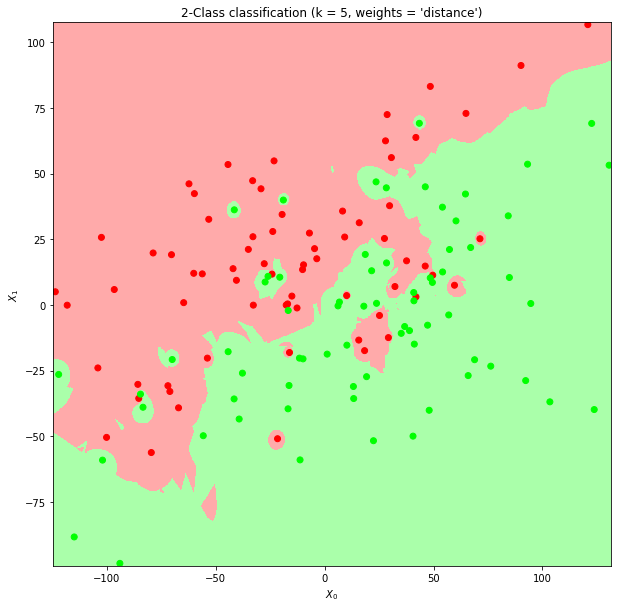

In [3]:
h = 0.2  # step size in the mesh
n_neighbors = 5

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$X_0$')
    plt.ylabel('$X_1$')
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### Logistická regrese 

  * U logistické regrese je hranice dána příslušnou nadrovinou.
  * Mohlo by se stát, že bychom vytvořili kruhovou rozhodovací hranici?

[[ 0.02555462 -0.04001793]] [0.19122164]


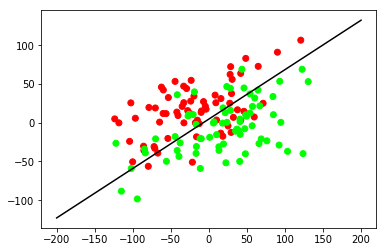

In [5]:
# logisticka regrese, zadny hyperparametry tady
clf = LogisticRegression()
clf.fit(X,y)
print(clf.coef_, clf.intercept_)

def fun(x, intercept, coef1, coef2):
    y = (-1/coef2)*(intercept + coef1*x)
    return y
# uděláme vektorovou funkci aby šlapala na ndarray
vfun = np.vectorize(fun)
xgrid = np.linspace(-200, 200, 200)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.plot(xgrid, vfun(xgrid, clf.intercept_, clf.coef_[0,0], clf.coef_[0,1]), 'k-')
plt.show()

## Parciální derivace a gradient

**Úkol**: Najděte gradient funkce $\ell(\mathbf{w})$ (viz přednášku):
$$
    \ell(\mathbf{w}) = \sum_{i = 1}^N \left(Y_i \ln \left( \frac{e^{\vec{w}^T \vec{x}}}{1 + e^{\vec{w}^T \vec{x}}} \right) + (1 - Y_i) \ln \left( \frac{1}{1 + e^{\vec{w}^T \vec{x}}} \right)\right).
$$
  * Pokuste se přepsat výsledek do maticového tvaru.
  * Projděte si [ukázku](https://courses.fit.cvut.cz/MI-MPI/media/tutorials/mpi-ukazka-1-parcialni-derivace-v1.pdf) z předmětu MI-MPI a pokuste se pochopit geometrickou interpretaci  parciální derivace a gradientu (příp. i Hessovy matice).




In [ ]:
# RSS(w) = suma yi - vektor_w

# derivuji RSS podle kazde Wj

    # zderivovana wj ... vsechno ostatni konstanty (=> zmizi) jen to wj podle kterho z nej je pak cislo
    # suma pres vsechny je pak chmm.. nevim fuck..
# RSS se napise jako SUM(yi- w.T * xi)^2
# pozn. norma^2 = v.T * v
# norma ... ||x||
# tedy ta suma je  ||Y-Xw|| ^ 2
# tedy RSS(w) = ||Y=Xw||^2
# a to se da napsat jako -2*X.T ( Y-Xw)
# kdyz se polozi gradient nulovemu vektrou
    # tak X.T * Xw = X.T * Y
    # to xt  x je skoro vzdy regualrni
    # tedy w = (X.T * X)^-1 * X.T * Y
# no a to je teda ta vec s tou hessovou matici (jakoby druhou deriavi) rovne 0

In [6]:
# >>>TEORIE OD MR. KLOUDY<<<

# gradient = vektor parcialnich derivaci
    # spocitam si gradient v bode -> vsechny promenne mam (to jsou moje data)
    # vysledkem bude nejaky vektor hodnot
    # gradient "lezi na definicnim oboru" , ne "na samotne funkci" tedy jakoby "lezi na zemi"
    # "nevidim nikam" jen jakym smerem mam jit protoze nic nevidim a muze to rust jenom chvili a pak spadnout
    # proto se jde vetsinou radeji jen "o trochu" = nasobim nejakym malym alfa
    # nakonec udelam tento krok a dostanu se do dalsiho bodu
# "gradient ukazuje ve smeru nejvetsiho vzrustu"
    # jakto ?
    # derivace o 1 promenne ukazuje miru stoupani
    # zaroven je to smernice primky kolme "na funkci" ? vazne ? nee viiim.
# w1 = w0 + alfa * gradient(w0)
  
    
# rez funkce - kolmy na definicni obor
    # vezmu primku v definicnim oboru
    # rez je pak ne primka, ale funkce, ktera popisuje ten rez, zejo....
# kdyz mam funky f(x,y)
# a za y neco dosadim,.. potom se k tu chovam jako je konstante
    # to reprezentuje pak nakou "primku"
    # pozn. kdybych chtel mi primku ve vice osach, pak tam dosadim neco co vypocitam z tech jinych promenych
        # takze se stejne te promenne zbavim ( zbavim se vice ?)
    # -> parcialni derivace funguje stejne, akorat za y muzu dosadit az potom
        # a to mi rika kde jsem to pak riznul
# v tom smeru kde to riznu, tak to pak derivuji

# parcialni derivace v jednom smeru 3, ve druhem 2, me ale zajima v nakem smeru danem vektoru s
    # me staci potom vynasobit gradient timto vektorem
    # ( neumsim slozite dosazovat nejakou primku a pak to derivovat, ale udelam to co je psano o radek driv)

# pozn. "derivace v nejakych mistech muze byt nula i kdyz tam neni max ani min"
    # napriklad jsem nekde na rovine a prede mnou / za mnou kopec, ale ja jdu v udoli, tak derivace 0 ale nic tam neni

# z hesovy matice muzu spocitat snadno druhou derivaci ve smeru
    # to udelam tak, ze vezmu zas ten smerovy vektor a udelam
        # s * HessMatice * s.Transpose
            # hess * s.Transpose = sloupecek
            # s * sloupecek = cislo
# maximum = druha derivace zaporna
# minimum = druha derivace kladna
# PROTO TEDY s * HessMatice * s.Transpose < 0 => ostre lokalni maximum
# NAPAK MINIMUM s * HessMatice * s.Transpose > 0 => ostre lokalni minimum
# to si stale neporadi se sedlem
    # kdyz najdu bod ze to je v jednom smeru kladne. v jinem zapornem
        # tomu se rika sedlovy bod a je to ten problem tech dvou hor
        
# sedlovy bod je jakasi altermativa k inflexnimu bodu pro vice rozemru

# semidefinitni matice, potom
    # PROTO TEDY s * HessMatice * s.Transpose <= 0
    
# nejvetsi smer je smer, kde ukazuje gradient


# norma vektoru = "delka vektrou"


# shrnuti 
    # 1 rozmer = 1. derivace -> tam kde 0 -> spocitam 2. derivace tam kde > 0 min, <0 max, =0 inflex
    # 2 a vice rozmeru = vektor parcialnich (gradient) -> tam kde 0, tam 2. derivace (hessovaMatice) >0, <0,=0